# Projet Machine Learning - Notebook R

---


In [ ]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")

In [1]:
# Chargement des librairies nécessaires :
library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)

Warning message:
"le package 'gtsummary' a été compilé avec la version R 4.3.3"


In [2]:
# Chargement des données :
path <- ""
data = read.table(paste(path, "Data_Sustainable_Energy.csv", sep = ""), sep = ",", header = TRUE)

In [3]:
# Premiere visualisation du jeu de données :

head(data)
str(data)
is.data.frame(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

[1] TRUE

Notre jeu de données "data" est de type data frame :
- 3649 observations (lignes)
- 21 variables (colonnes)

Il contient :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

In [4]:
# Transformation des données (qualitatif/quantitatif)

data$Entity = as.factor(data$Entity) # ok : 176 niveaux : 176 pays : ok
data$Year = as.factor(data$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

In [5]:
# Analyse des valeurs manquantes :

B = summary(data)

Val_Manquante = data.frame(B[7,])

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":")

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
str(Val_Manquante)
Val_Manquante$Val = Val_Manquante$Val/36.49
Val_Manquante

'data.frame':	21 obs. of  2 variables:
 $ Type: chr  "(Other)            " "(Other)" "NA's   " "NA's   " ...
 $ Val : num  3523 2599 10 169 931 ...


,Type,Val
,<chr>,<dbl>
Entity,(Other),96.54699918
Year,(Other),71.22499315
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082


In [45]:
# Suppression des variables contenant trop de valeur manquante (> à un certain % : 25% ici)
head(data)
data3 = data[,c(-5, -6, -15)]
str(data3) # ok c'est le bon truc


# On regarde le nombre de na par ligne (on veut suppr les lignes où y'a des na pour en avoir aucune)

# rowSums(is.na(data3)) # si on trouve pas mieux, je met dans une liste et je m'en sort.

data4 = na.omit(data3)

colnames(data4) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")


,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

**Analyse unidimensionnelle**

Plot chaque variable en histogramme, quelle variables on transforme ? Peut être renormalisation de certaines? 

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

In [46]:
str(data4)

colnames(data4)[3]

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

[1] "Access_to_elec"

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrcis tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

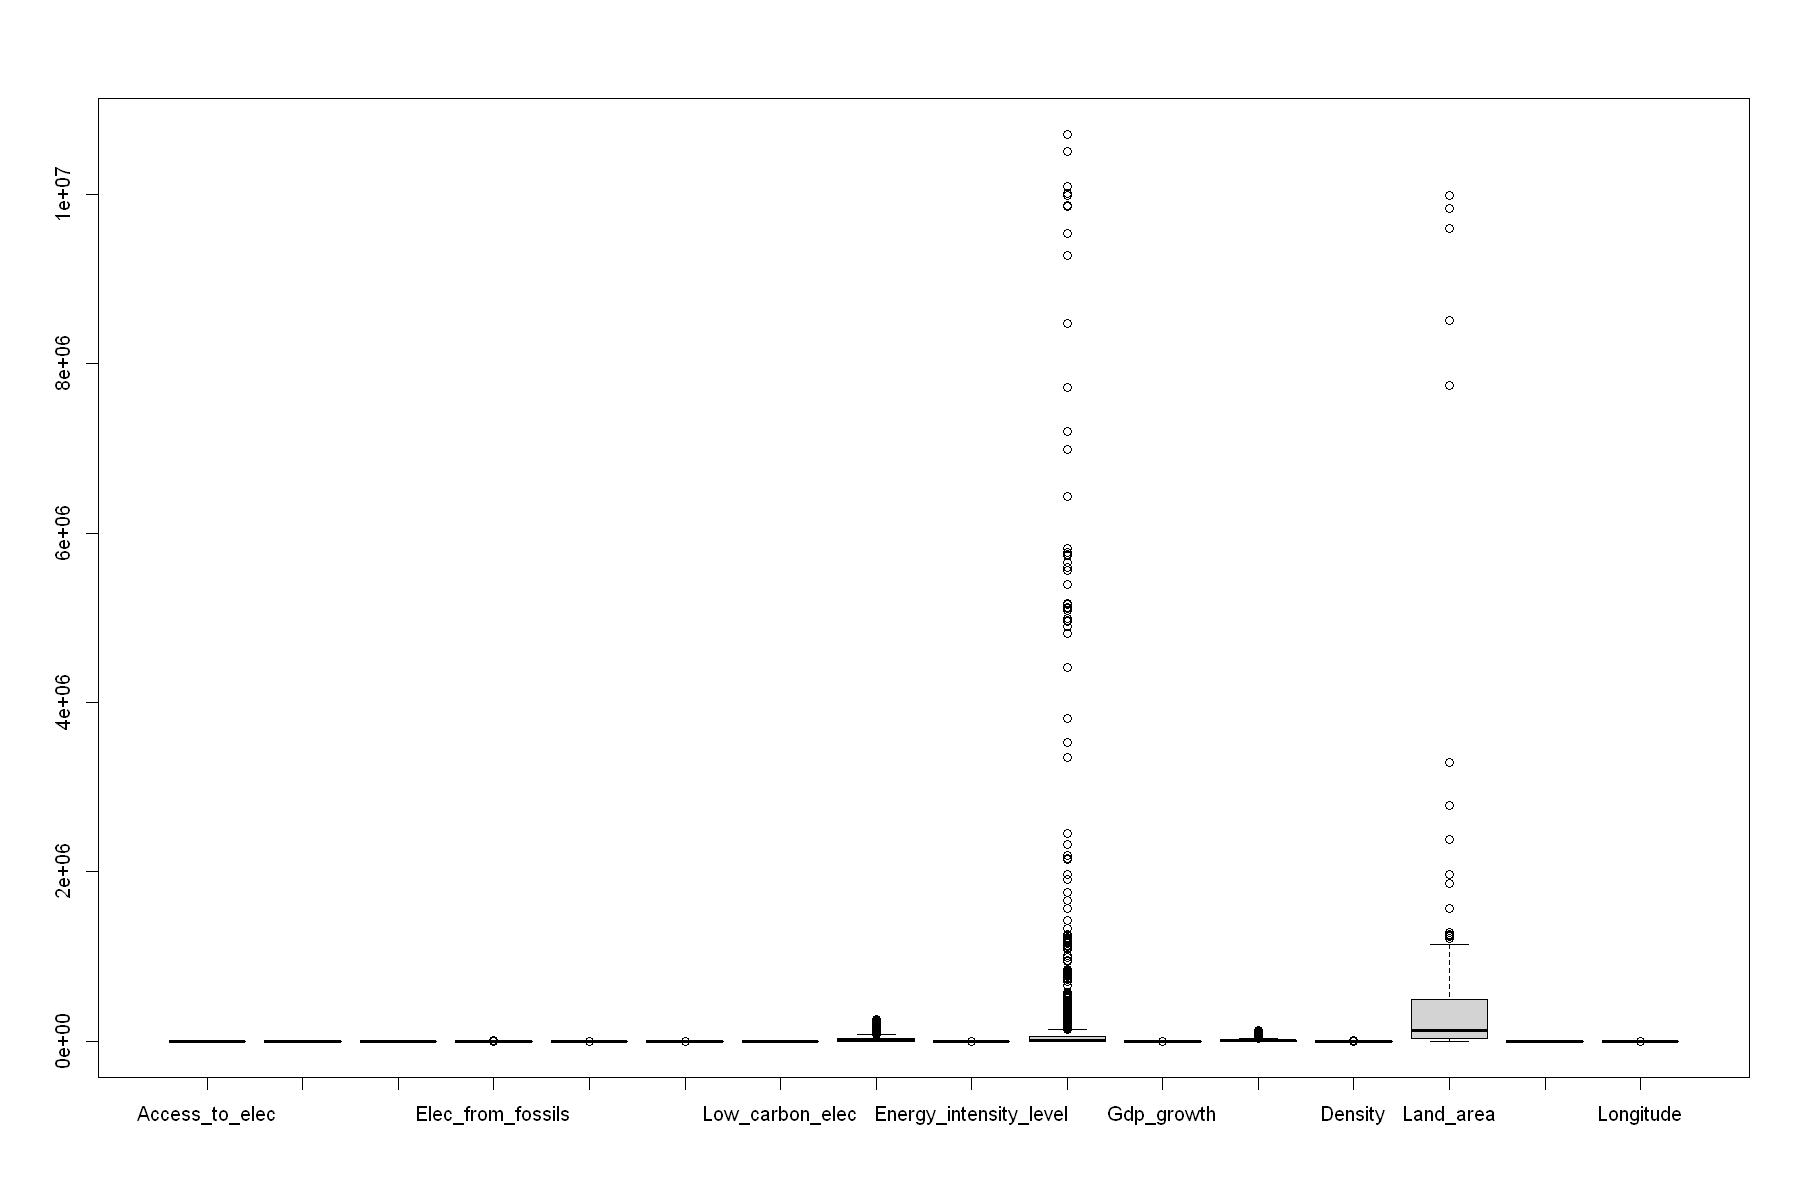

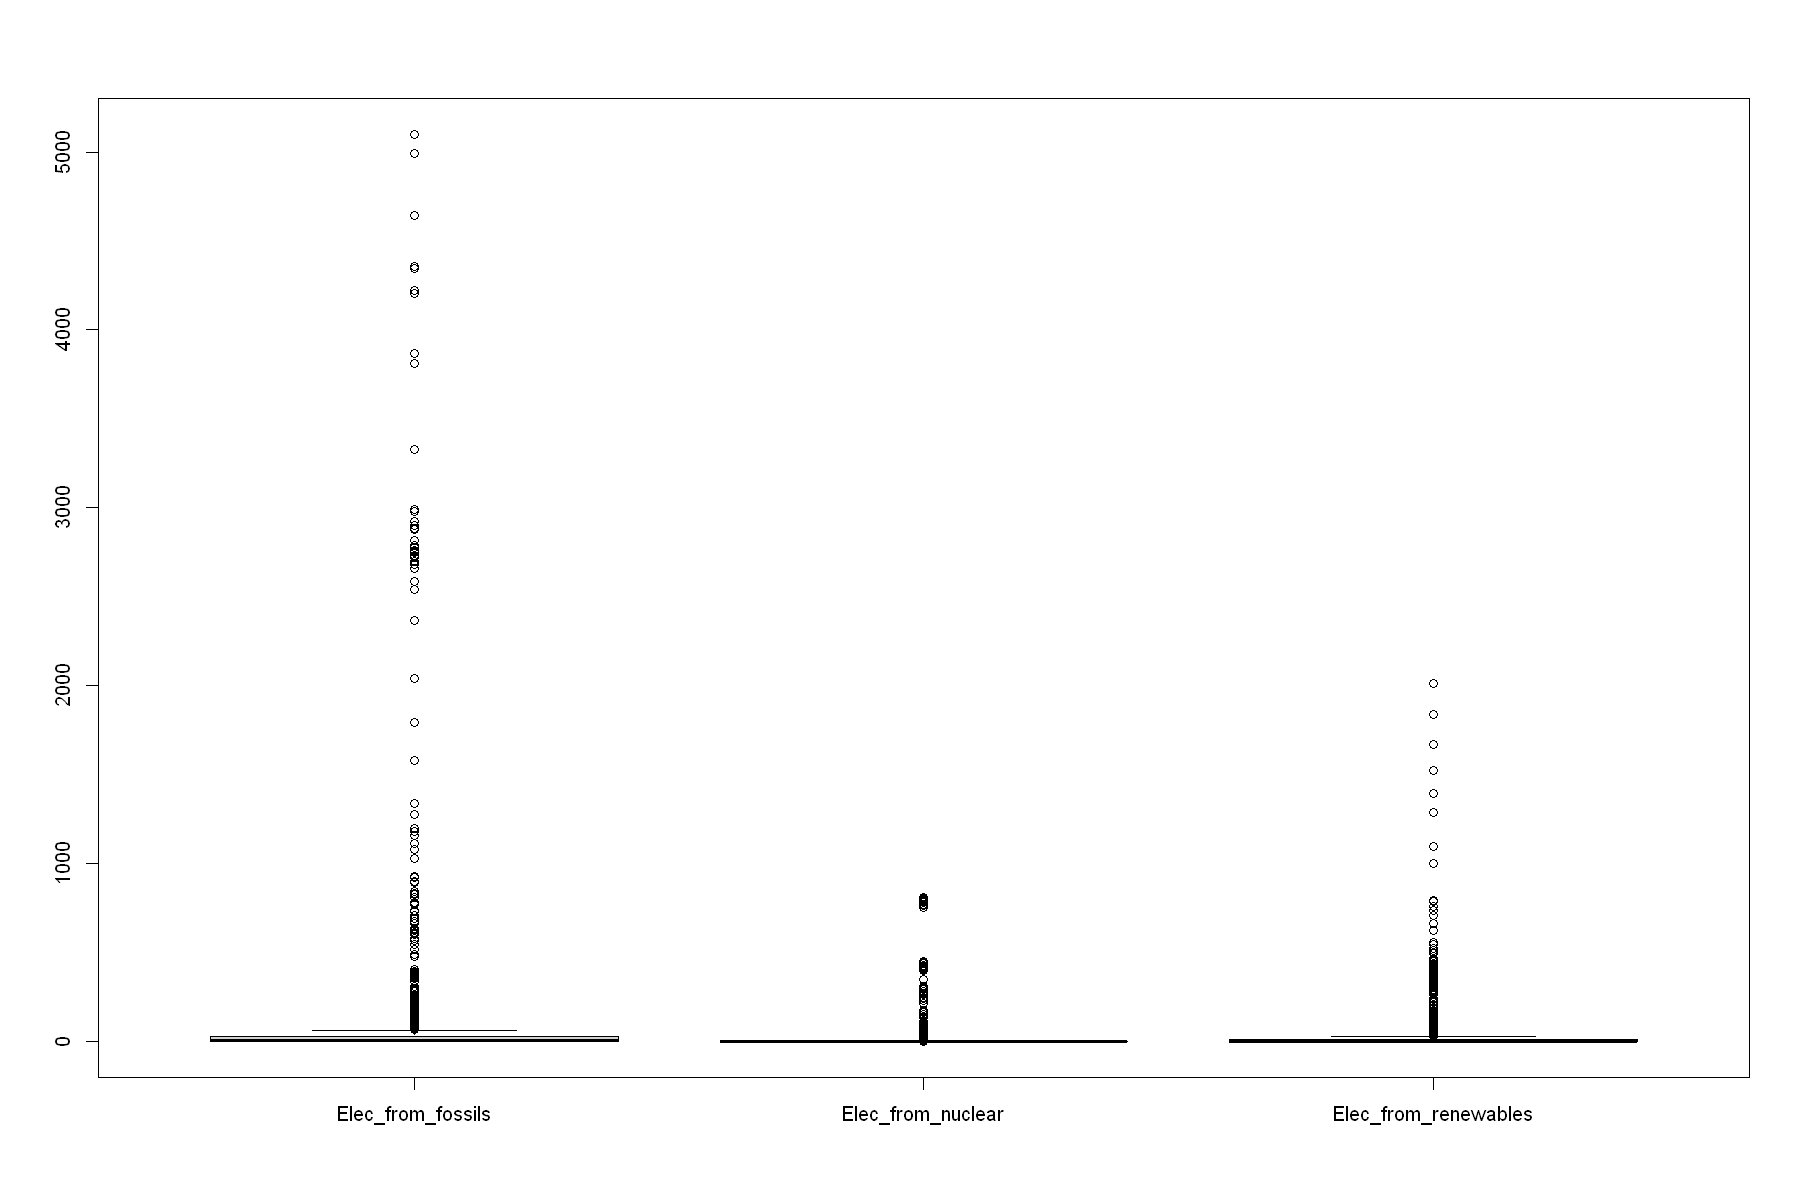

In [47]:

options(repr.plot.width = 15, repr.plot.height = 10)

boxplot(data4[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data4[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

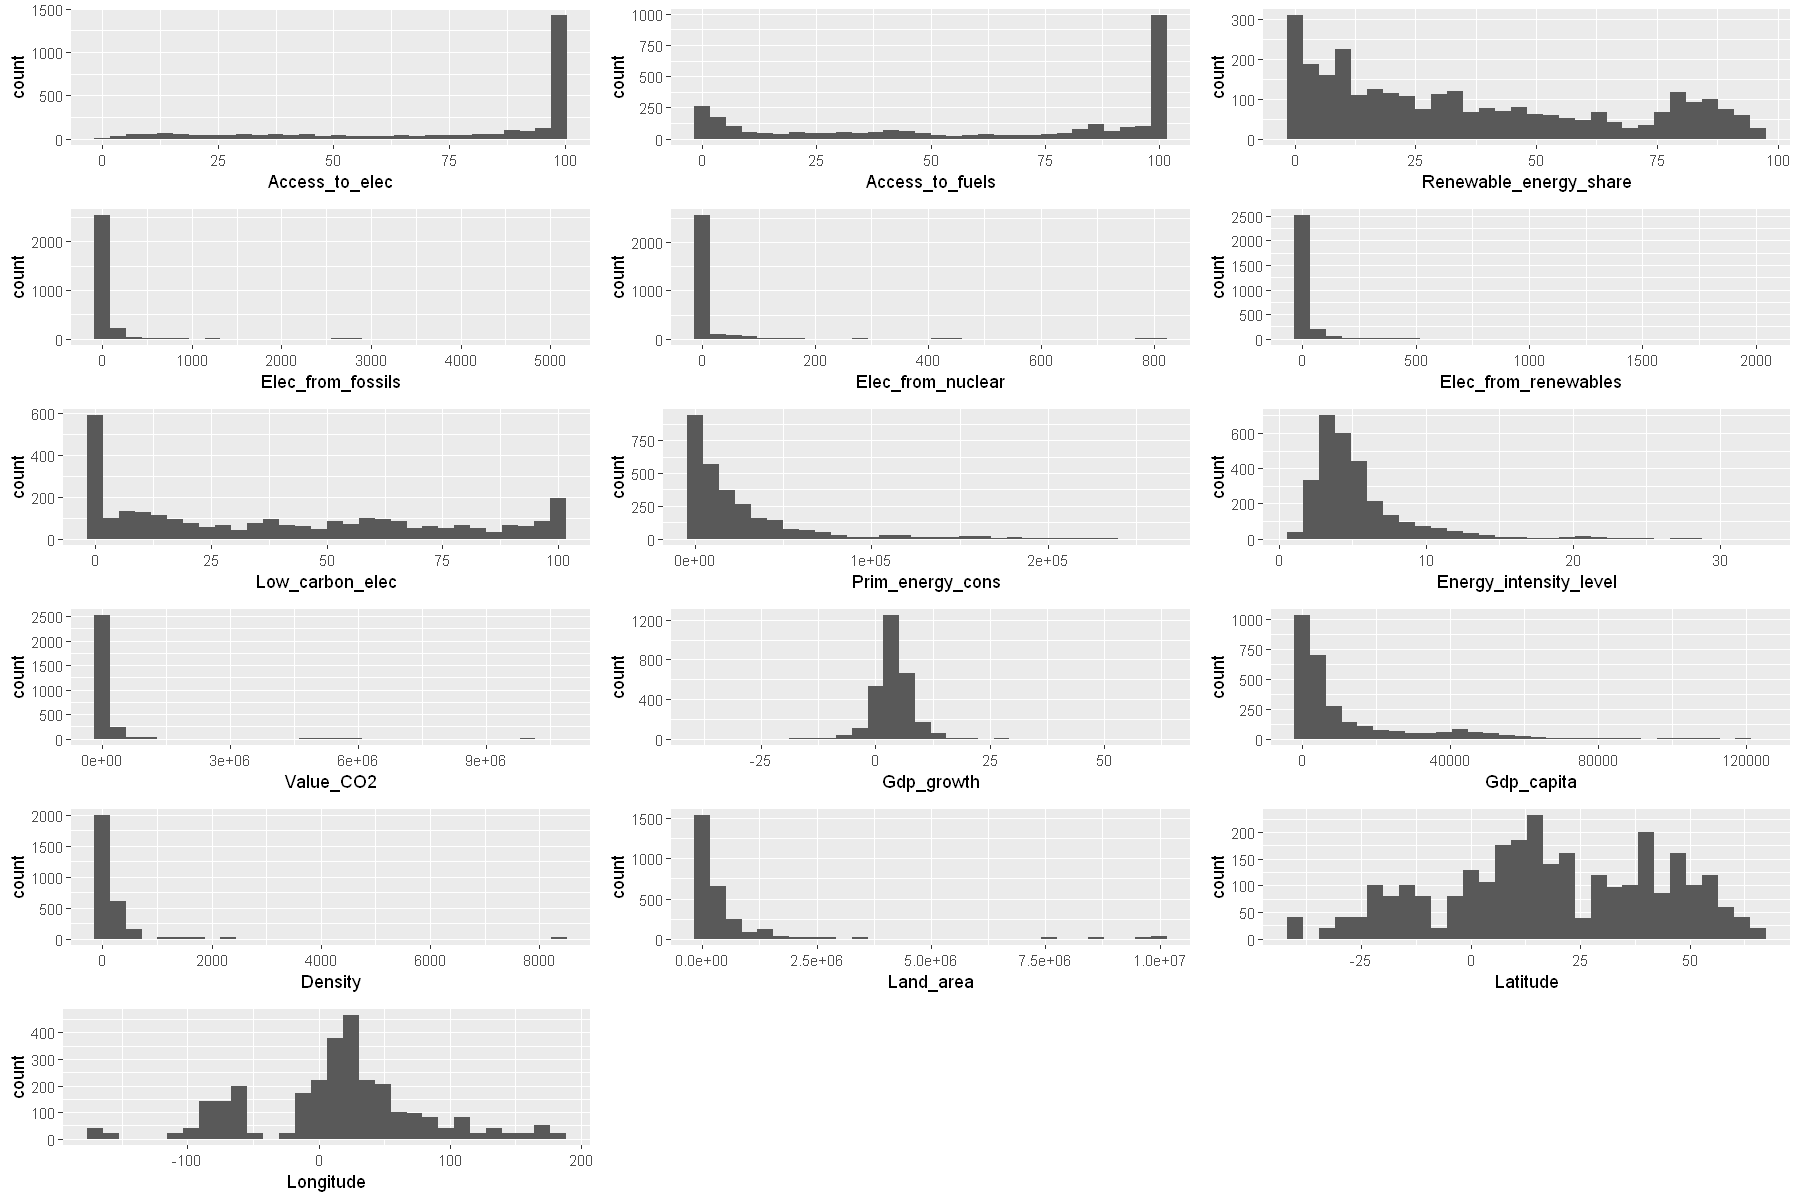

In [48]:

# h3 <- ggplot(data4, , stat="count", aes(x=colnames(data4[3]))) + geom_histogram(aes(y=colnames(data4[12]))) + geom_density(alpha = 0.2, fill = "orange")

# h4 <- ggplot(data4, aes(x=colnames(data4[3]))) + geom_hist()



# barplot(data4$Access.to.electricity....of.population.)

# 


h3 <- ggplot(data4, aes(x=Access_to_elec)) + geom_histogram()
h4 <- ggplot(data4, aes(x=Access_to_fuels)) + geom_histogram()
h5 <- ggplot(data4, aes(x=Renewable_energy_share)) + geom_histogram()
h6 <- ggplot(data4, aes(x=Elec_from_fossils)) + geom_histogram()
h7 <- ggplot(data4, aes(x=Elec_from_nuclear)) + geom_histogram()
h8 <- ggplot(data4, aes(x=Elec_from_renewables)) + geom_histogram()
h9 <- ggplot(data4, aes(x=Low_carbon_elec)) + geom_histogram()
h10 <- ggplot(data4, aes(x=Prim_energy_cons)) + geom_histogram()
h11 <- ggplot(data4, aes(x=Energy_intensity_level)) + geom_histogram()
h12 <- ggplot(data4, aes(x=Value_CO2)) + geom_histogram()
h13 <- ggplot(data4, aes(x=Gdp_growth)) + geom_histogram()
h14 <- ggplot(data4, aes(x=Gdp_capita)) + geom_histogram()
h15 <- ggplot(data4, aes(x=Density)) + geom_histogram()
h16 <- ggplot(data4, aes(x=Land_area)) + geom_histogram()
h17 <- ggplot(data4, aes(x=Latitude)) + geom_histogram()
h18 <- ggplot(data4, aes(x=Longitude)) + geom_histogram()

grid.arrange(h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18 ,ncol=3)

Warning message in log(data4[, "Gdp_growth"]):
"Production de NaN"
Warning message in sqrt(data4[, "Gdp_growth"]):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 101 rows containing non-finite values (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 416 rows containing n

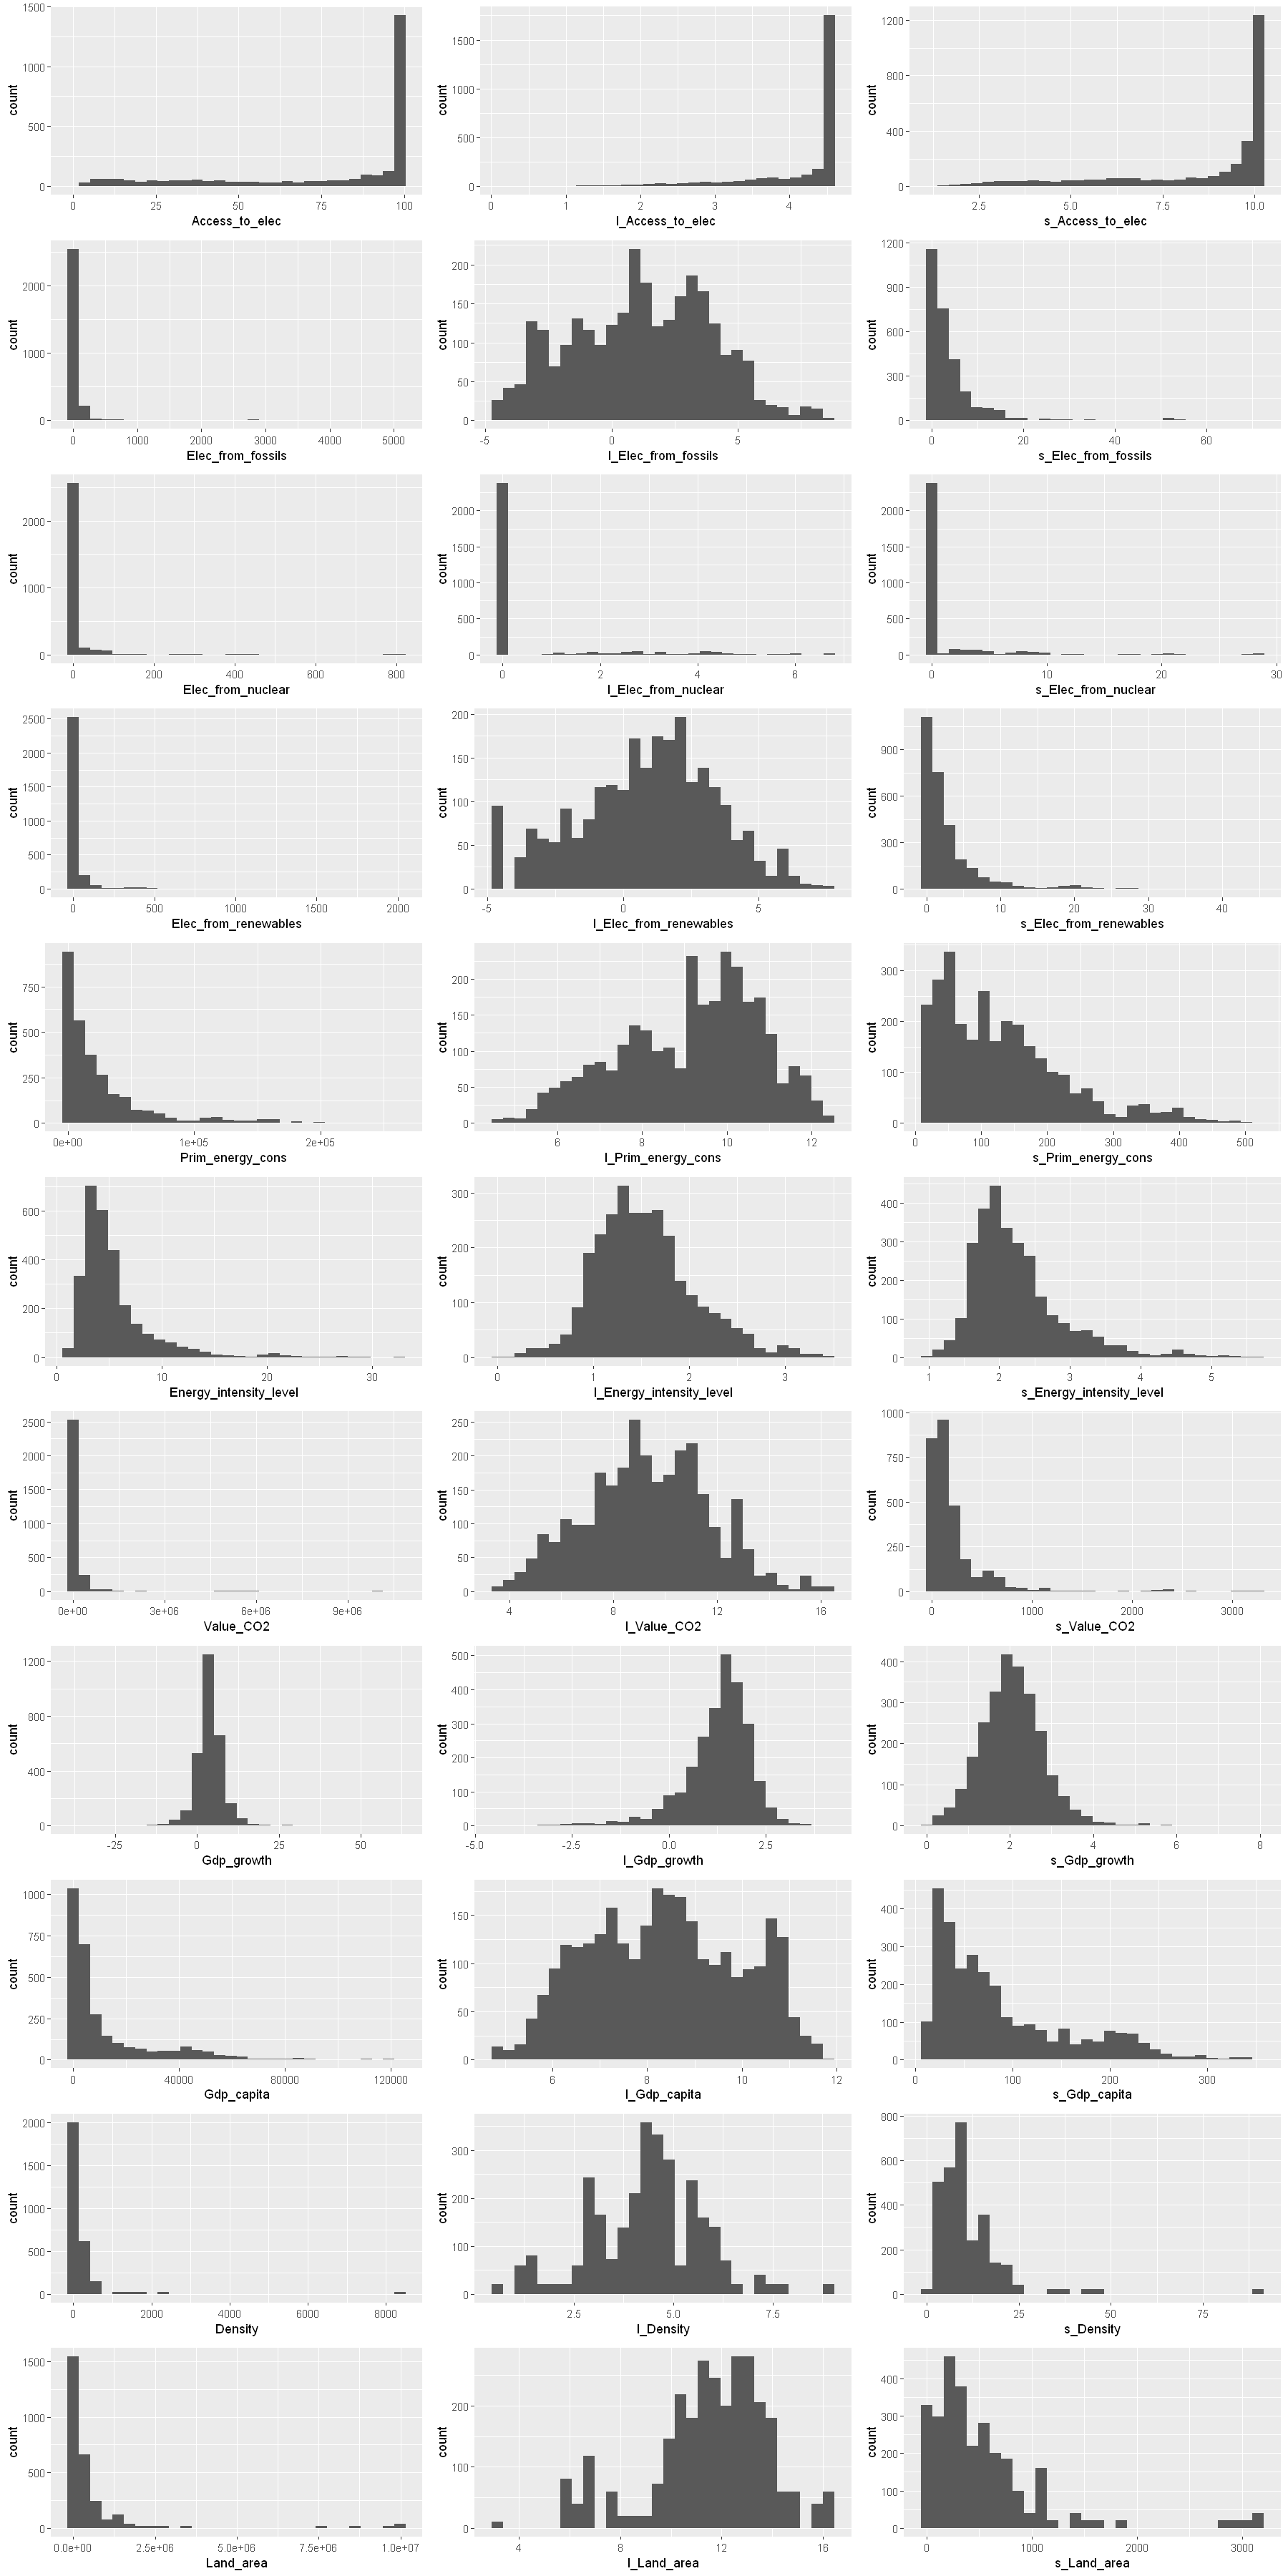

In [49]:
options(repr.plot.width = 15, repr.plot.height = 30)

data4[,"l_Access_to_elec"] = log(data4[,"Access_to_elec"])
data4[,"s_Access_to_elec"] = sqrt(data4[,"Access_to_elec"])

data4[,"l_Elec_from_fossils"] = log(data4[,"Elec_from_fossils"])
data4[,"s_Elec_from_fossils"] = sqrt(data4[,"Elec_from_fossils"])

data4[,"l_Elec_from_nuclear"] = log(data4[,"Elec_from_nuclear"]+1)
data4[,"s_Elec_from_nuclear"] = sqrt(data4[,"Elec_from_nuclear"])

data4[,"l_Elec_from_renewables"] = log(data4[,"Elec_from_renewables"])
data4[,"s_Elec_from_renewables"] = sqrt(data4[,"Elec_from_renewables"])

data4[,"l_Prim_energy_cons"] = log(data4[,"Prim_energy_cons"])
data4[,"s_Prim_energy_cons"] = sqrt(data4[,"Prim_energy_cons"])

data4[,"l_Energy_intensity_level"] = log(data4[,"Energy_intensity_level"])
data4[,"s_Energy_intensity_level"] = sqrt(data4[,"Energy_intensity_level"])

data4[,"l_Value_CO2"] = log(data4[,"Value_CO2"])
data4[,"s_Value_CO2"] = sqrt(data4[,"Value_CO2"])

data4[,"l_Gdp_growth"] = log(data4[,"Gdp_growth"])
data4[,"s_Gdp_growth"] = sqrt(data4[,"Gdp_growth"])

data4[,"l_Gdp_capita"] = log(data4[,"Gdp_capita"])
data4[,"s_Gdp_capita"] = sqrt(data4[,"Gdp_capita"])

data4[,"l_Density"] = log(data4[,"Density"])
data4[,"s_Density"] = sqrt(data4[,"Density"])

data4[,"l_Land_area"] = log(data4[,"Land_area"])
data4[,"s_Land_area"] = sqrt(data4[,"Land_area"])

h19 <- ggplot(data4, aes(x=l_Access_to_elec)) + geom_histogram()
h20 <- ggplot(data4, aes(x=s_Access_to_elec)) + geom_histogram()

h21 <- ggplot(data4, aes(x=l_Elec_from_fossils)) + geom_histogram()
h22 <- ggplot(data4, aes(x=s_Elec_from_fossils)) + geom_histogram()

h23 <- ggplot(data4, aes(x=l_Elec_from_nuclear)) + geom_histogram()
h24 <- ggplot(data4, aes(x=s_Elec_from_nuclear)) + geom_histogram()

h25 <- ggplot(data4, aes(x=l_Elec_from_renewables)) + geom_histogram()
h26 <- ggplot(data4, aes(x=s_Elec_from_renewables)) + geom_histogram()

h27 <- ggplot(data4, aes(x=l_Prim_energy_cons)) + geom_histogram()
h28 <- ggplot(data4, aes(x=s_Prim_energy_cons)) + geom_histogram()

h29 <- ggplot(data4, aes(x=l_Energy_intensity_level)) + geom_histogram()
h30 <- ggplot(data4, aes(x=s_Energy_intensity_level)) + geom_histogram()

h31 <- ggplot(data4, aes(x=l_Value_CO2)) + geom_histogram()
h32 <- ggplot(data4, aes(x=s_Value_CO2)) + geom_histogram()

h33 <- ggplot(data4, aes(x=l_Gdp_growth)) + geom_histogram()
h34 <- ggplot(data4, aes(x=s_Gdp_growth)) + geom_histogram()

h35 <- ggplot(data4, aes(x=l_Gdp_capita)) + geom_histogram()
h36 <- ggplot(data4, aes(x=s_Gdp_capita)) + geom_histogram()

h37 <- ggplot(data4, aes(x=l_Density)) + geom_histogram()
h38 <- ggplot(data4, aes(x=s_Density)) + geom_histogram()

h39 <- ggplot(data4, aes(x=l_Land_area)) + geom_histogram()
h40 <- ggplot(data4, aes(x=s_Land_area)) + geom_histogram()


grid.arrange(h3, h19, h20, h6, h21, h22, h7, h23, h24, h8, h25, h26, h10, h27, h28, h11, h29, h30, h12, h31, h32, h13, h33, h34, h14, h35, h36, h15, h37, h38, h16, h39, h40, ncol=3)


In [50]:
str(data4)
head(data4)

'data.frame':	2868 obs. of  40 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils       : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables    : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons        : num  230 204 252 304 354 ...
 $ Energy_intensity_level  : num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita       

,Entity,Year,Access_to_elec,Access_to_fuels,Renewable_energy_share,Elec_from_fossils,Elec_from_nuclear,Elec_from_renewables,Low_carbon_elec,Prim_energy_cons,⋯,l_Value_CO2,s_Value_CO2,l_Gdp_growth,s_Gdp_growth,l_Gdp_capita,s_Gdp_capita,l_Density,s_Density,l_Land_area,s_Land_area
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Afghanistan,2003,14.73851,9.50,36.66,0.31,0,0.63,67.02128,229.9682,⋯,7.106606,34.92850,2.178413,2.971915,5.250617,13.80883,4.094345,7.745967,13.38815,807.6076
5,Afghanistan,2004,20.06497,10.90,44.24,0.33,0,0.56,62.92135,204.2312,⋯,6.937314,32.09361,0.346506,1.189167,5.353667,14.53898,4.094345,7.745967,13.38815,807.6076
6,Afghanistan,2005,25.39089,12.20,33.88,0.34,0,0.59,63.44086,252.0691,⋯,7.346010,39.37004,2.418563,3.351077,5.489067,15.55736,4.094345,7.745967,13.38815,807.6076
7,Afghanistan,2006,30.71869,13.85,31.89,0.20,0,0.64,76.19048,304.4209,⋯,7.473069,41.95235,1.678479,2.314607,5.574940,16.23988,4.094345,7.745967,13.38815,807.6076
8,Afghanistan,2007,36.05101,15.30,28.78,0.20,0,0.75,78.94737,354.2799,⋯,7.478735,42.07137,2.626574,3.718376,5.885251,18.96558,4.094345,7.745967,13.38815,807.6076
9,Afghanistan,2008,42.40000,16.70,21.17,0.19,0,0.54,73.97260,607.8335,⋯,8.177516,59.66574,1.367362,1.981157,5.898975,19.09617,4.094345,7.745967,13.38815,807.6076


On va restandardiser : 

- On tente un log sur celles qui ont un pic d'un côté.
- On tente racine sur d'autres.

Proposition à faire à Emilight et Paolight :
- Gdp grosse en sqrt et le reste en log point final à la ligne arretez de discuter.

Et on enlève celle qu'on utilise plus.

In [51]:
# A RUN UNE SEULE FUCKING FOIS PAS DEUX PAS TROIS ESPECE DE GROS CON 

# data4 <- data4[,c(1, 2, 3, 4, 5, 21, 23, 25, 9, 27, 29, 12, 34, 35, 37, 39, 17, 18)]
str(data4)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ l_Elec_from_fossils     : num  -1.17 -1.11 -1.08 -1.61 -1.61 ...
 $ l_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ l_Elec_from_renewables  : num  -0.462 -0.58 -0.528 -0.446 -0.288 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ l_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ l_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ s_Gdp_growth            : num  2.97 1.19 3.35 2.31 3.72 ...
 $ l_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ l

**Nature des variables**

Faire blabla sur type des variables : en tout 18 variables 
- Entity et Year = 2 qualitatives (qui sont bien en facteurs)
- Le reste quantitative = 16 

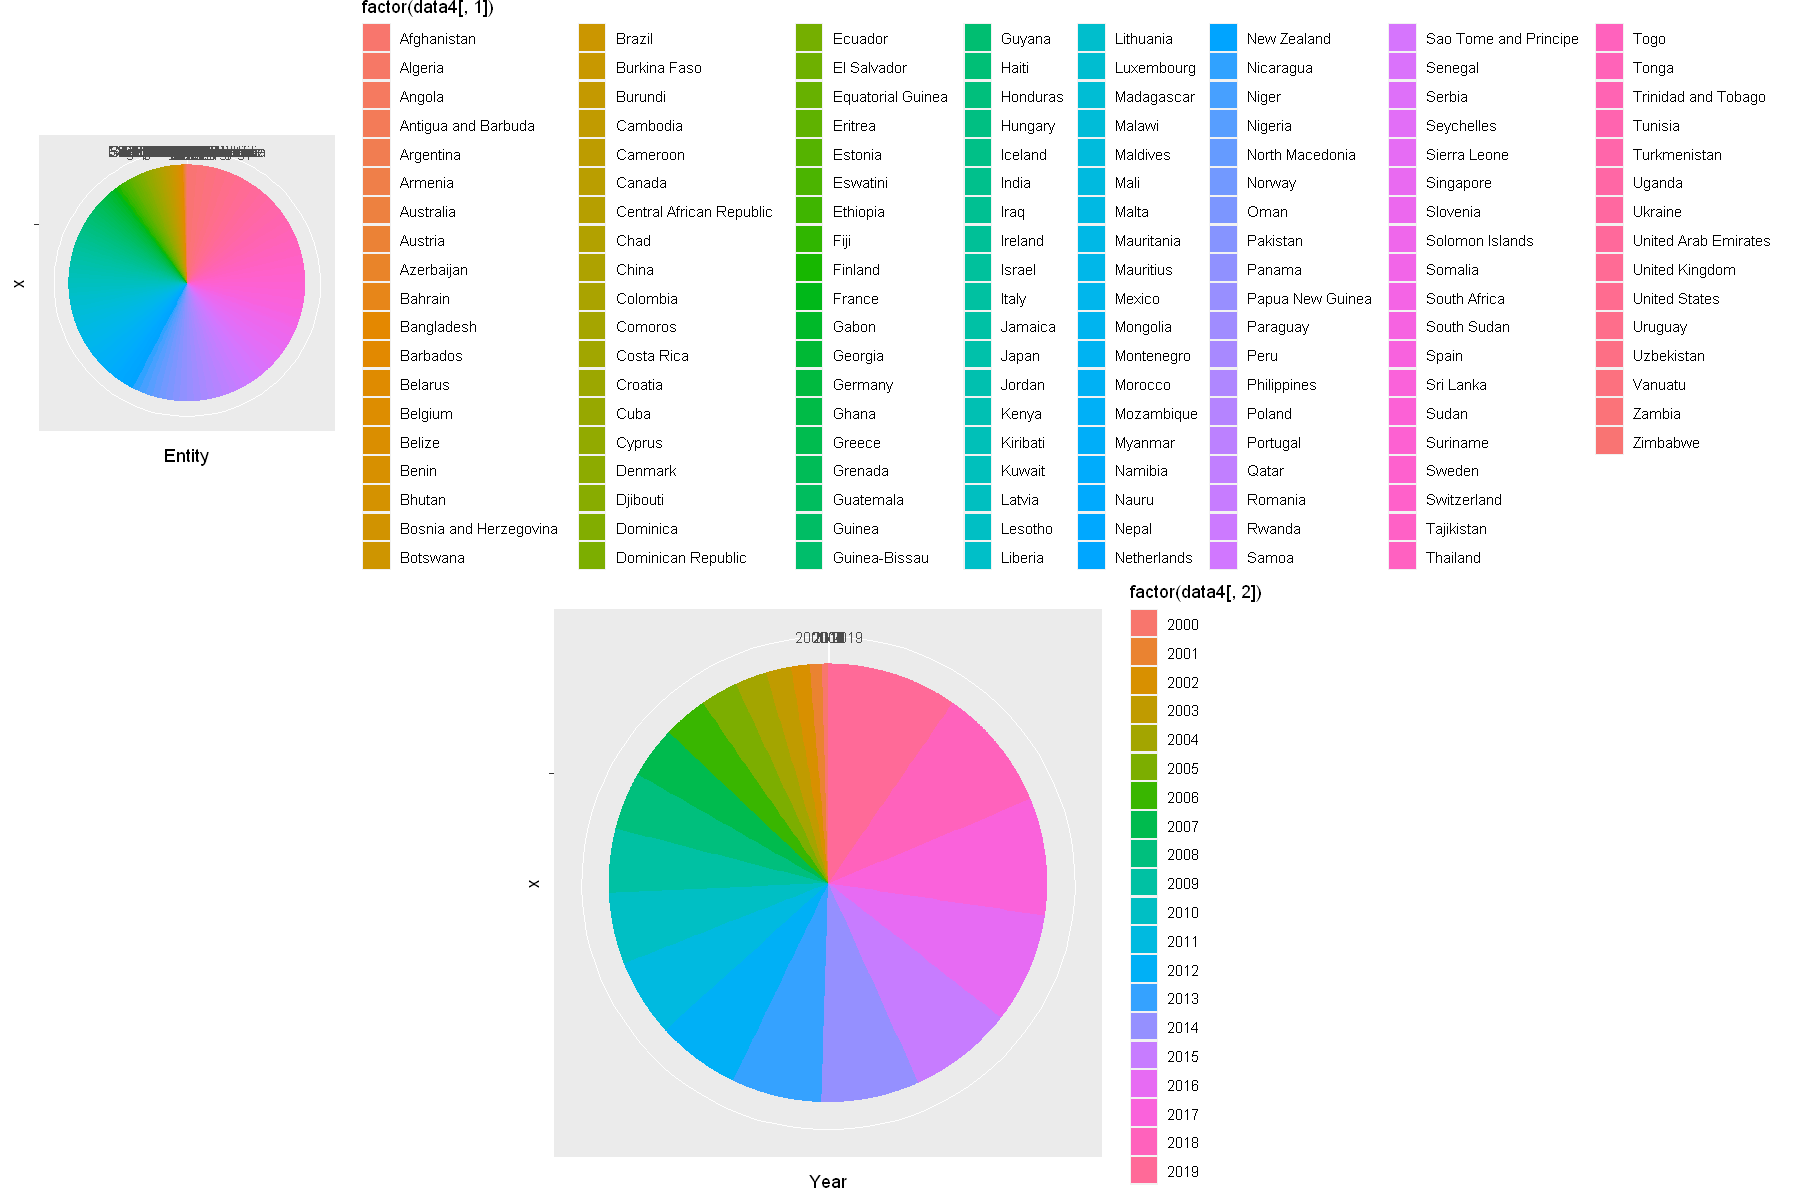

In [42]:
# Piechart

options(repr.plot.width = 15, repr.plot.height = 10)

p1 = ggplot(data4, aes(x="", y=Entity, fill=factor(data4[,1]))) + geom_col() + coord_polar(theta = "y")
p2 = ggplot(data4, aes(x="", y=Year, fill=factor(data4[,2]))) + geom_col() + coord_polar(theta = "y")

grid.arrange(p1,p2, ncol=1)

**Grande heterogeneite de CO2**

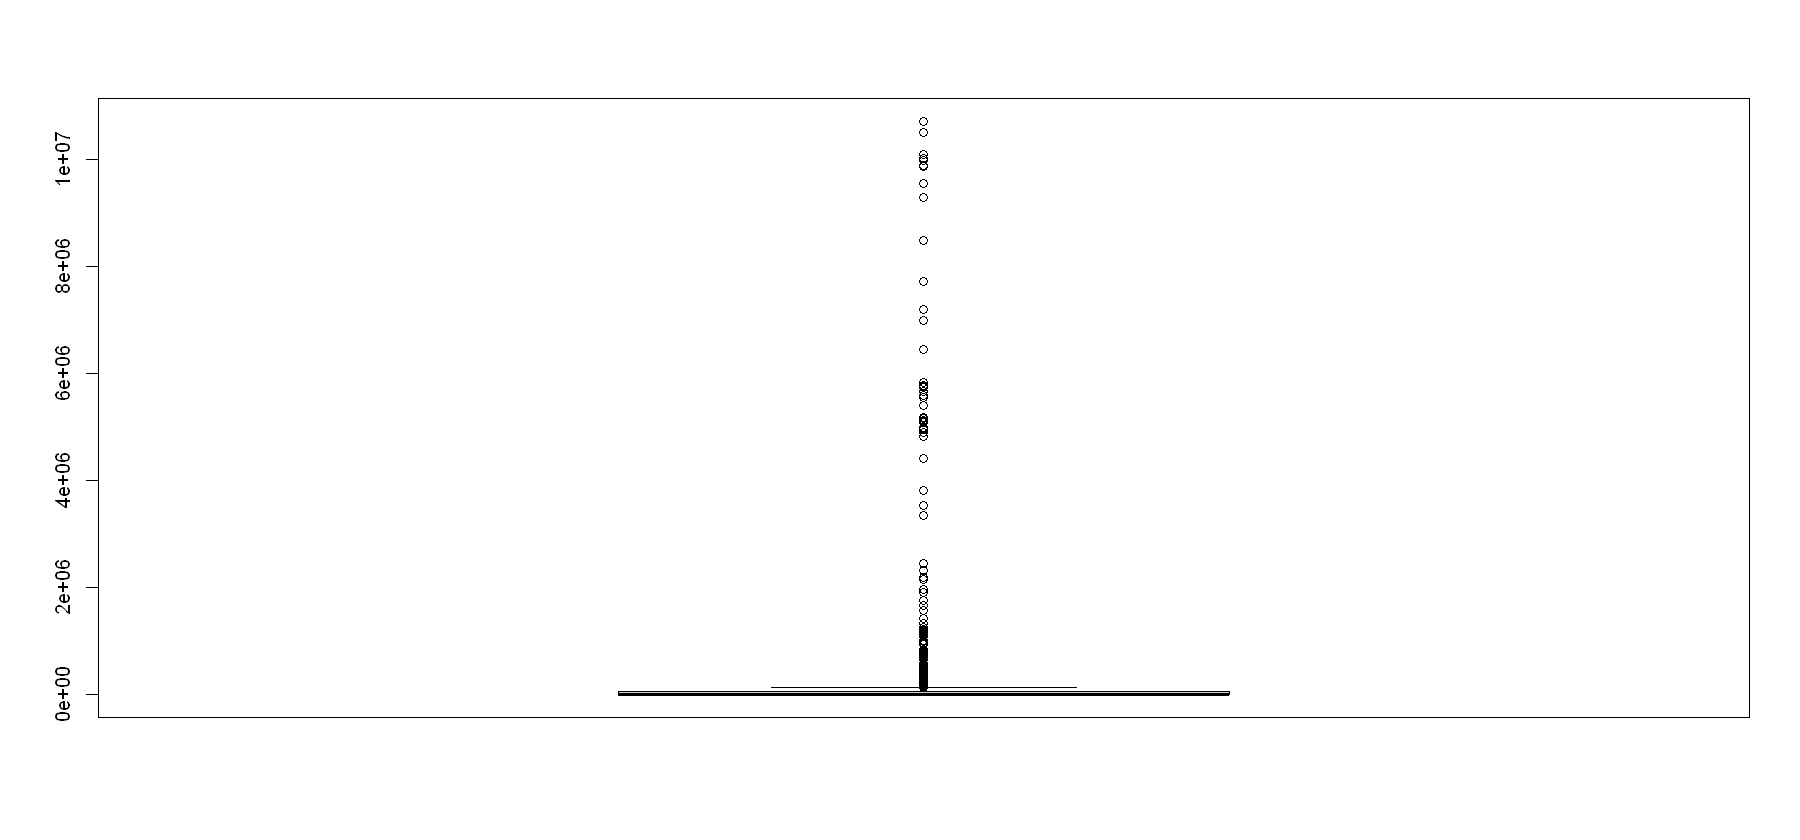

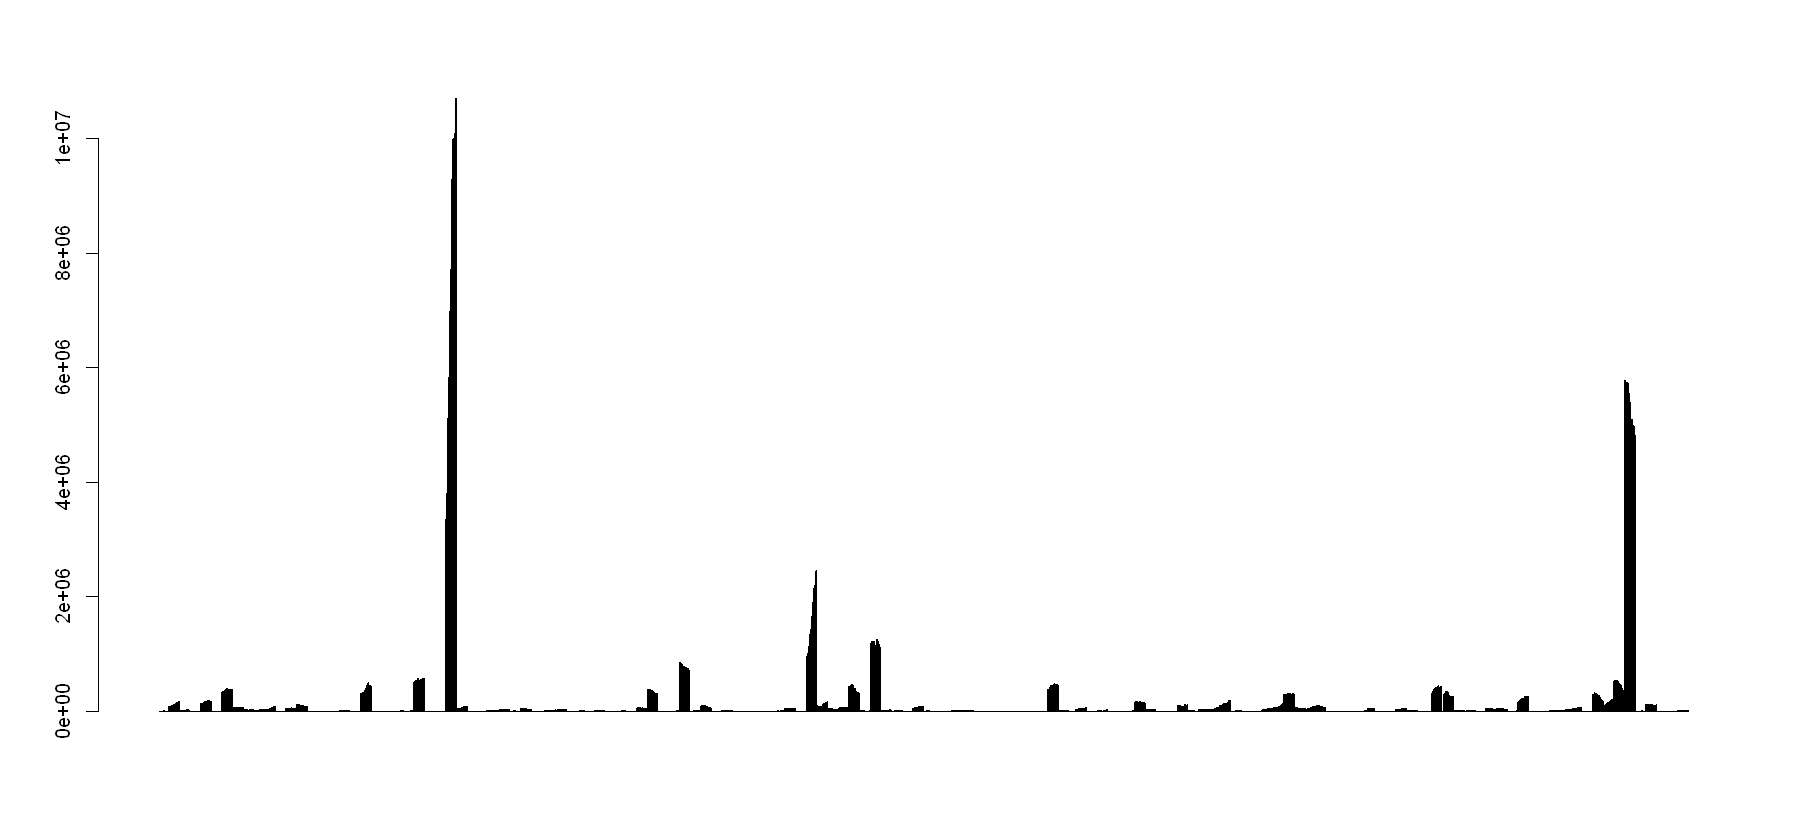

In [55]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data4[,12])
barplot(data4[,12])

moy_value_co2 = list()

for (i in 1:176) {
    
}

In [127]:
nb_annee_pays = list()

j=1

for (i in levels(data4[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data4$Entity))
    j=j+1
}

moy_value_co2 = list()

No = 1

for (j in levels(data4[,1])) {
    data_sub = subset(data4, data4$Entity==j)
    moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    No = No+1
}

moy_value_co2 = data.frame(moy_value_co2)

colnames(moy_value_co2) = levels(data4[,1])

head(moy_value_co2)

# order(moy_value_co2)

moy_value_co2 = t(moy_value_co2)

colnames(moy_value_co2) = c("Pays", "Moyenne_CO2")


head(moy_value_co2)

moy_ordonnee = order(moy_value_co2, decreasing=TRUE)

head(moy_value_co2[moy_ordonnee,])


,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,⋯,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,⋯,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
2,4643.52944317647,NaN,119921.0000665,21689.4998625,512.99999769,160462.001865,4776.5000062,NaN,375537.99914,67977.499839,⋯,263449.50139,150518.9998465,470603.999635,5329538.5342,6323.50002105,118427.0007035,122.9999989345,NaN,3559.0000165,11040.00010985


,Pays,Moyenne_CO2
Afghanistan,Afghanistan,4643.52944317647
Albania,Albania,NaN
Algeria,Algeria,119921.0000665
Angola,Angola,21689.4998625
Antigua and Barbuda,Antigua and Barbuda,512.99999769
Argentina,Argentina,160462.001865


ERROR: Error in moy_value_co2[moy_ordonnee, ]: indice hors limites
